<a href="https://colab.research.google.com/github/fidanfatih/Pycoders_Capstone/blob/main/class5_data_manuplation_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA MANIPULATION - WEEK 3

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploratory Data Analysis (EDA)

**df.describe()**

**df.isnull() / df.isna()**

**df.notnull() / df.notna()**

**df.drop() - df.dropna()**

**Series.unique**

**Series.nunique**

**Series.value_counts()**

**Series.min()**

**Series.max()**

**Series.mean()**

**Series.sum()**

**Series.count()**

**df.astype()**

## Convert Categorical Variable to Numeric

**pd.get_dummies() >> (`Nominal to Numeric`)**

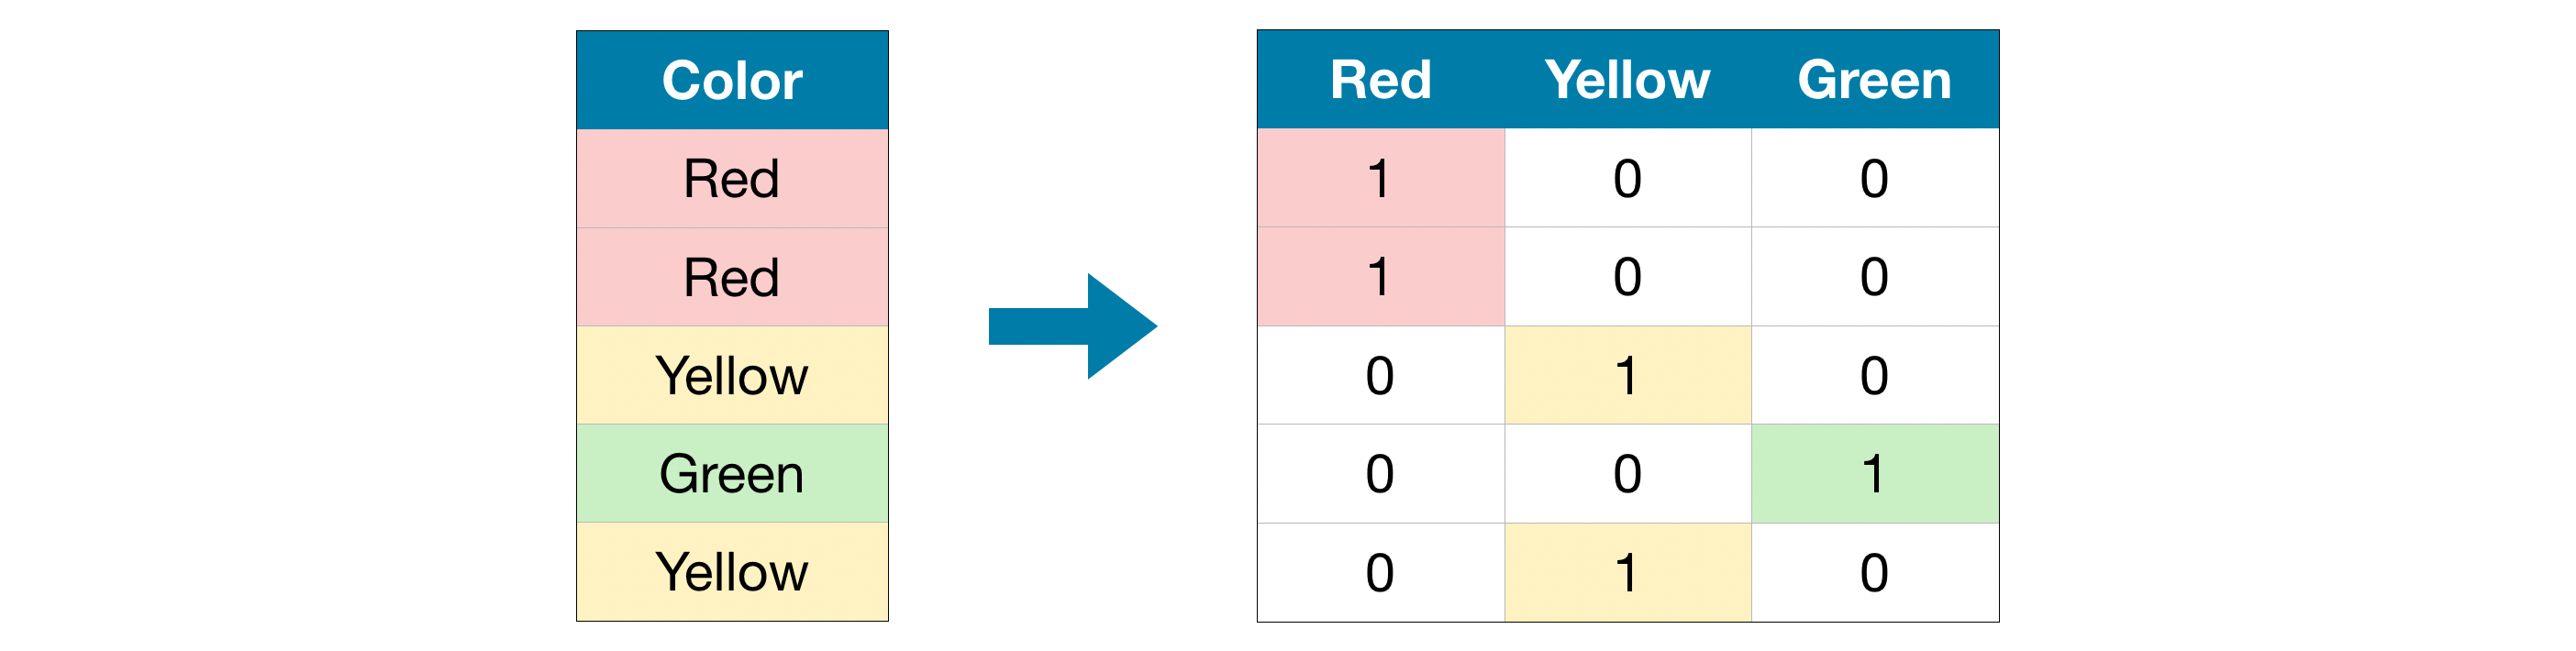

**df.replace() - df.map() (`Ordinal to Numeric`)**

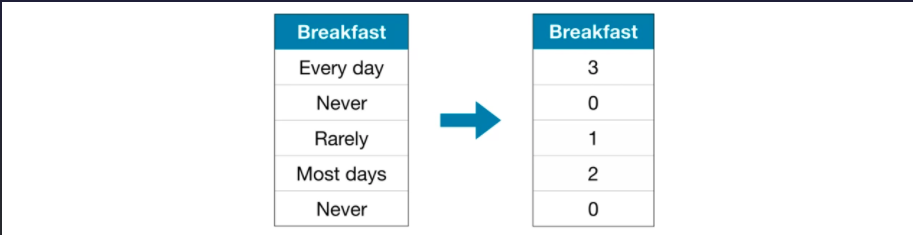

In [ ]:
df.replace()

In [ ]:
df.map()

## Digitalize Numeric Data
`np.digitize()`

In [65]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [54]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [56]:
df.dropna(subset=['age'], axis=0, inplace=True)

In [57]:
bins = np.array([0, 3, 13, 18, 30, 60, 100])
digitized = np.digitize(df.age, bins)

In [63]:
# pd.Series(digitized).value_counts().sort_index().plot.bar();
pd.Series(digitized).value_counts().sort_index()

1     24
2     45
3     44
4    271
5    304
6     26
dtype: int64

In [61]:
df.age=digitized
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,4,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,5,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,4,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,5,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,5,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,4,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,4,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,4,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Grouping and Aggregation

**df.groupby()**

**df.groupby().aggregate()**

**df.groupby().filter()**

**df.groupby().transform()**

**df.groupby().apply()**

**pd.crosstab()**

## Import and Export Dataset

**pd.read_csv() and df.to_csv()**
<br>path, sep, header, index_col parameters

**pd.read_excel() and df.to_excel()**
<br>sheet_name parameter

**pd.read_pickle() and df.to_pickle()**

## Hierarchical indexing (MultiIndex)

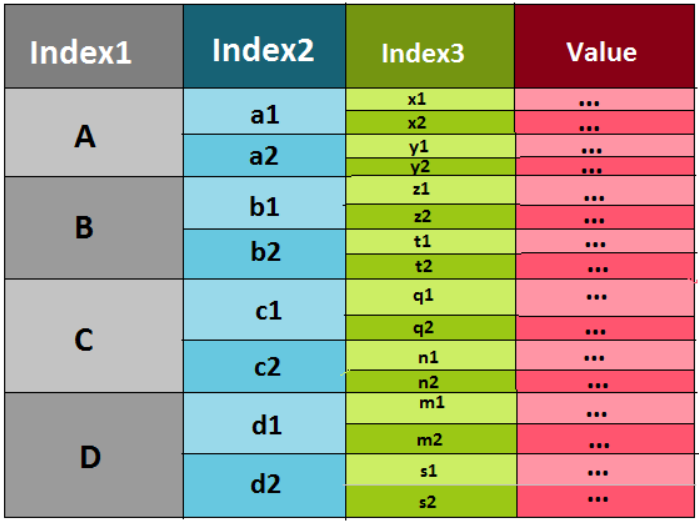

**MultiIndex.from_product()**

In [ ]:
group_1=["opel", "bmw", "audi", "toyota"]
group_2=["sedan", "hatchback"]
iterables = [group_1, group_2]

In [ ]:
index = pd.MultiIndex.from_product(iterables, names=["make", "model"])
index

MultiIndex([(  'opel',     'sedan'),
            (  'opel', 'hatchback'),
            (   'bmw',     'sedan'),
            (   'bmw', 'hatchback'),
            (  'audi',     'sedan'),
            (  'audi', 'hatchback'),
            ('toyota',     'sedan'),
            ('toyota', 'hatchback')],
           names=['make', 'model'])

In [ ]:
df = pd.DataFrame(0, index=index, columns=["price","mileage","weight"])

# df = pd.DataFrame(np.random.randint(10**5, size=(8,3)), 
#                   index=index,  
#                   columns=["price","mileage","weight"])
df

price  mileage  weight
make   model                            
opel   sedan          0        0       0
       hatchback      0        0       0
bmw    sedan          0        0       0
       hatchback      0        0       0
audi   sedan          0        0       0
       hatchback      0        0       0
toyota sedan          0        0       0
       hatchback      0        0       0

**Hierarchical columns**

In [ ]:
df.T

make     opel             bmw            audi           toyota          
model   sedan hatchback sedan hatchback sedan hatchback  sedan hatchback
price       0         0     0         0     0         0      0         0
mileage     0         0     0         0     0         0      0         0
weight      0         0     0         0     0         0      0         0

In [ ]:
# df = pd.DataFrame(0, index=["price", "mileage", "weight"], columns=index)
# df = pd.DataFrame(np.nan, index=["price", "mileage", "weight"], columns=index)

df = pd.DataFrame(np.random.randn(3,8), 
                  index=["price", "mileage", "weight"], 
                  columns=index)

df

make         opel                 bmw  ...      audi    toyota          
model       sedan hatchback     sedan  ... hatchback     sedan hatchback
price   -0.279298 -0.901559 -0.747590  ...  0.413043  0.205663 -0.495114
mileage -1.815153 -0.450980  1.313032  ... -0.591058  0.175243  1.498463
weight  -2.725638  1.063447 -0.992398  ... -0.830939  0.080884  0.040907

[3 rows x 8 columns]

## Pivoting and Stacking

**df.pivot()**

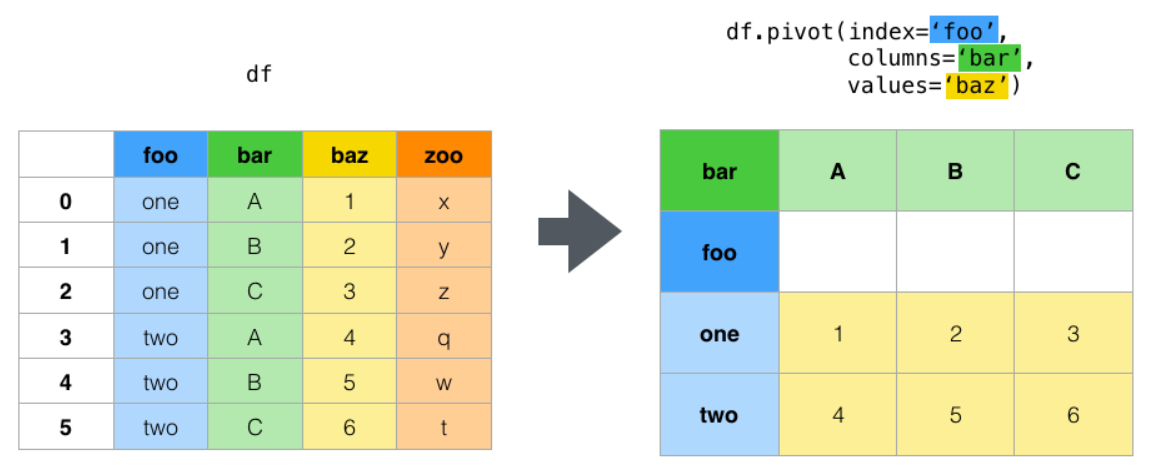

In [ ]:
df = pd.DataFrame(np.random.randint(10**5, size=(8,3)), 
                  index=index,  
                  columns=["price","mileage","weight"])
df.reset_index(inplace=True)
df

,make,model,price,mileage,weight
0,opel,sedan,83798,55438,78206
1,opel,hatchback,85039,1567,29339
2,bmw,sedan,83450,98307,36548
3,bmw,hatchback,72437,8310,86945
4,audi,sedan,74676,86429,61945
5,audi,hatchback,44674,15956,60073
6,toyota,sedan,31585,77060,80814
7,toyota,hatchback,56226,86723,63102


In [ ]:
df.pivot(index='make',columns='model',values='price')

model,hatchback,sedan
make,,
audi,44674,74676
bmw,72437,83450
opel,85039,83798
toyota,56226,31585


In [ ]:
df.pivot(index='make',columns='model')

price          mileage           weight       
model  hatchback  sedan hatchback  sedan hatchback  sedan
make                                                     
audi       44674  74676     15956  86429     60073  61945
bmw        72437  83450      8310  98307     86945  36548
opel       85039  83798      1567  55438     29339  78206
toyota     56226  31585     86723  77060     63102  80814

**df.stack()**

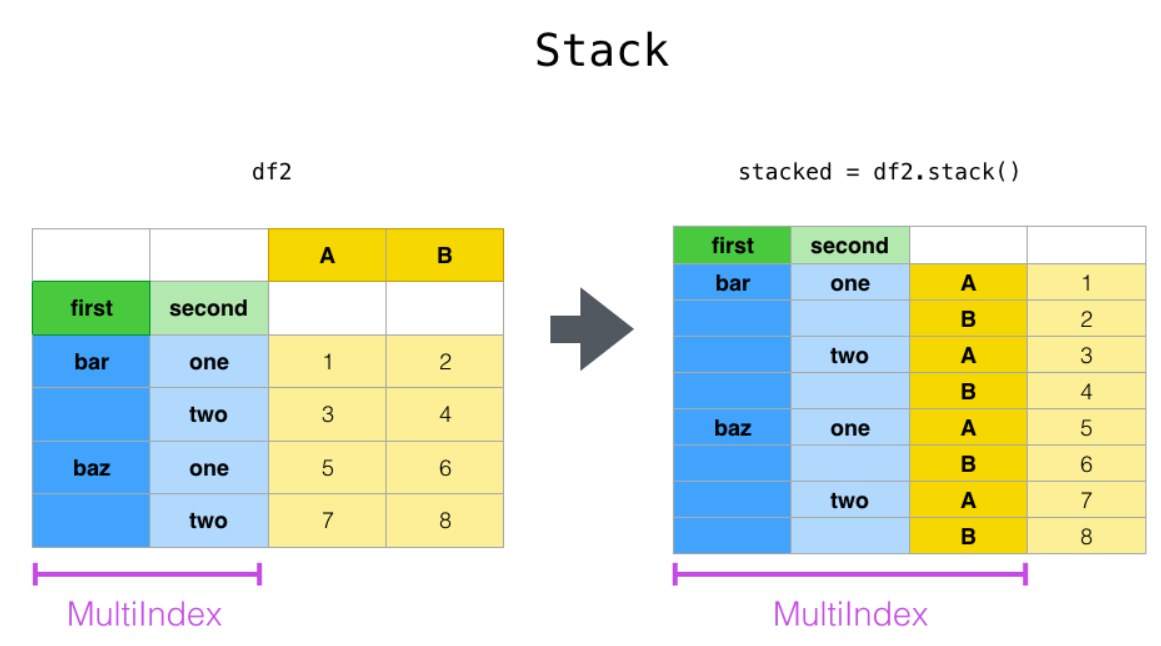

In [ ]:
df = pd.DataFrame(np.random.randint(10**5, size=(8,3)), 
                  index=index,  
                  columns=["price","mileage","weight"])
df

price  mileage  weight
make   model                            
opel   sedan      27289    77744   36300
       hatchback  69629    54185   38352
bmw    sedan      90565     6585   14462
       hatchback  62739    56071   40913
audi   sedan      20420     3314   53152
       hatchback  56323    29293   41975
toyota sedan      97356    81491   22270
       hatchback  30264    28646   22105

In [ ]:
# df.stack().to_frame()
df.stack()

make    model             
opel    sedan      price      27289
                   mileage    77744
                   weight     36300
        hatchback  price      69629
                   mileage    54185
                   weight     38352
bmw     sedan      price      90565
                   mileage     6585
                   weight     14462
        hatchback  price      62739
                   mileage    56071
                   weight     40913
audi    sedan      price      20420
                   mileage     3314
                   weight     53152
        hatchback  price      56323
                   mileage    29293
                   weight     41975
toyota  sedan      price      97356
                   mileage    81491
                   weight     22270
        hatchback  price      30264
                   mileage    28646
                   weight     22105
dtype: int64

In [ ]:
stacked= df.stack()

**df.unstack( )**

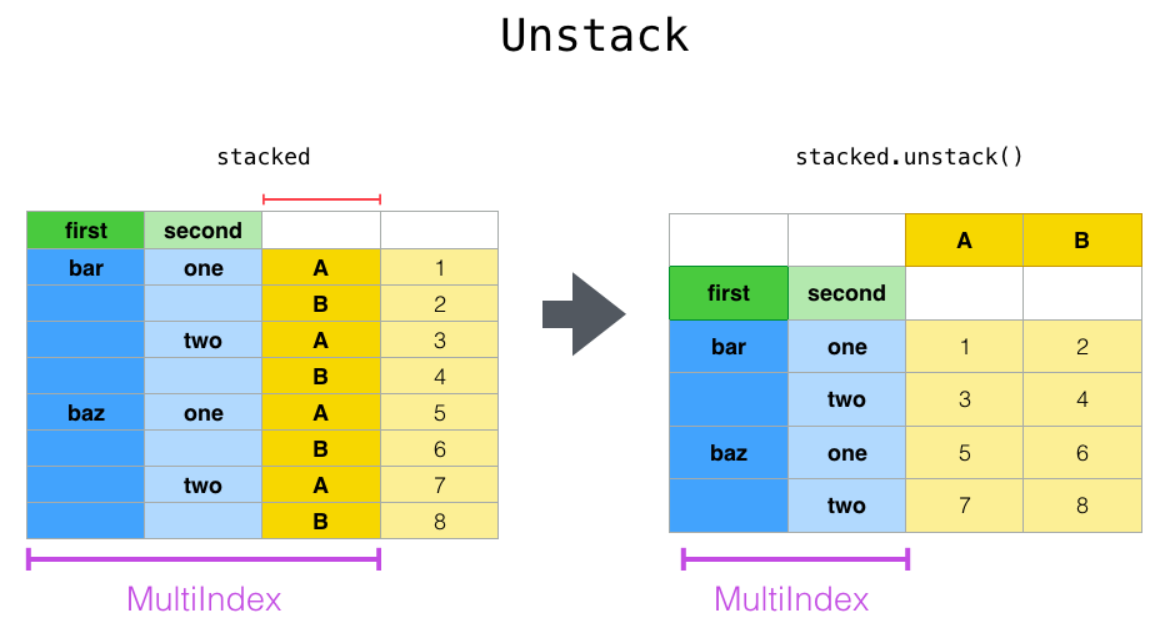

In [ ]:
stacked.unstack()  
#or
#stacked.unstack(2)
#stacked.unstack(-1)


# stacked.unstack(0)
# stacked.unstack(1)

price  mileage  weight
make   model                            
audi   hatchback  56323    29293   41975
       sedan      20420     3314   53152
bmw    hatchback  62739    56071   40913
       sedan      90565     6585   14462
opel   hatchback  69629    54185   38352
       sedan      27289    77744   36300
toyota hatchback  30264    28646   22105
       sedan      97356    81491   22270

## Pivot Tables

**df.pivot_table()**
<br>index, columns, aggfunc, margins parameters

In [ ]:
df = pd.DataFrame(np.random.randint(10**5, size=(8,3)), 
                  index=index,  
                  columns=["price","mileage","weight"]).reset_index()
df

,make,model,price,mileage,weight
0,opel,sedan,14544,31676,19052
1,opel,hatchback,176,86929,82515
2,bmw,sedan,25820,50753,36045
3,bmw,hatchback,43956,59110,97257
4,audi,sedan,27164,49125,98966
5,audi,hatchback,46623,21674,49585
6,toyota,sedan,61571,36884,38668
7,toyota,hatchback,60566,75041,33129


In [ ]:
# pd.pivot_table(df, values="price", index="make") # as a default:  aggfunc=np.mean
pd.pivot_table(df, values="price", index="make", aggfunc=np.sum)

,price
make,
audi,73787
bmw,69776
opel,14720
toyota,122137


In [ ]:
pd.pivot_table(df, values=["price","mileage","weight"], index="make", aggfunc={'price': np.mean,
                                                                               'mileage': np.median,
                                                                               "weight": np.max})

,mileage,price,weight
make,,,
audi,35399.5,36893.5,98966
bmw,54931.5,34888.0,97257
opel,59302.5,7360.0,82515
toyota,55962.5,61068.5,38668


In [ ]:
# Alternative
df.groupby("make").agg({'price' : ['mean'], 
                        'mileage' : ['median'], 
                        'weight' : ['max']}).droplevel(1, axis=1)

,price,mileage,weight
make,,,
audi,36893.5,35399.5,98966
bmw,34888.0,54931.5,97257
opel,7360.0,59302.5,82515
toyota,61068.5,55962.5,38668


## What is Missing Data?

## Missingno  visual anaylsis

**missingno**

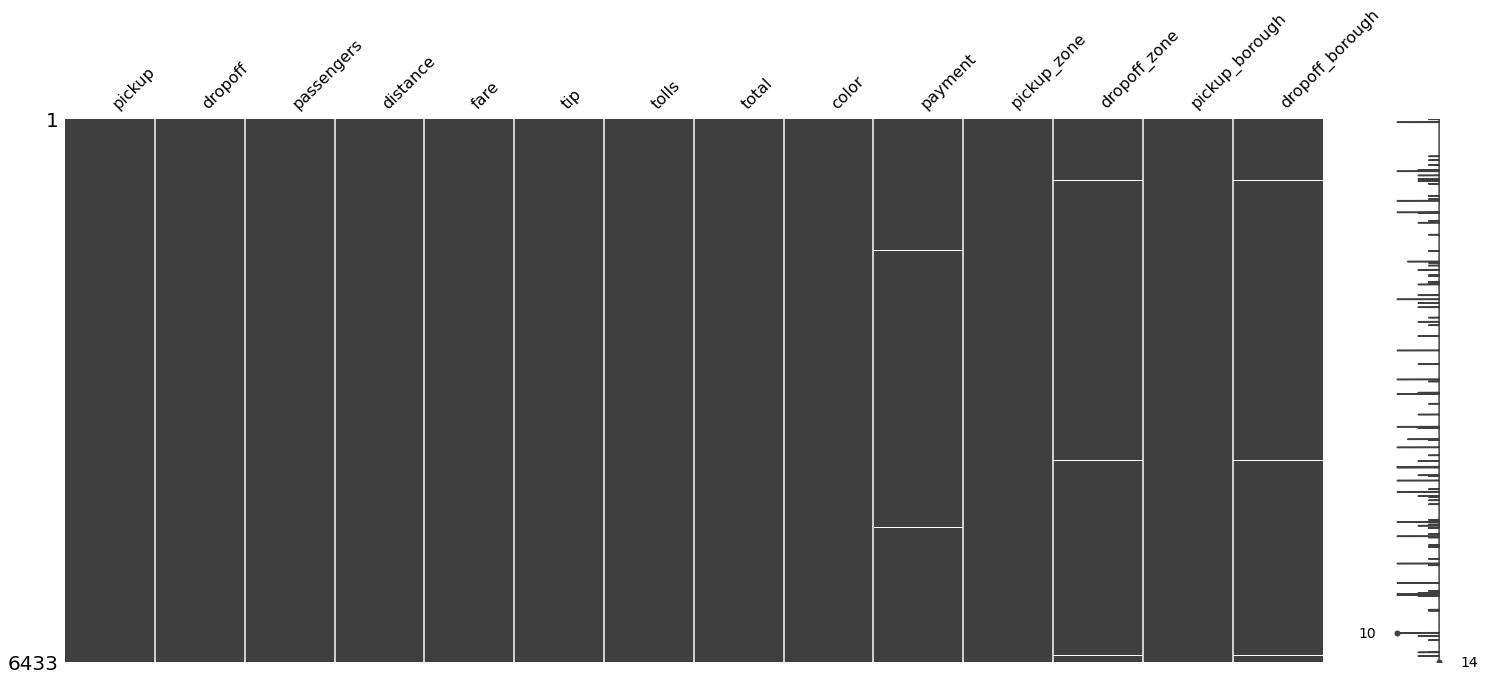

In [107]:
import missingno as msno
msno.matrix(df);

In [ ]:
msno.bar(df);

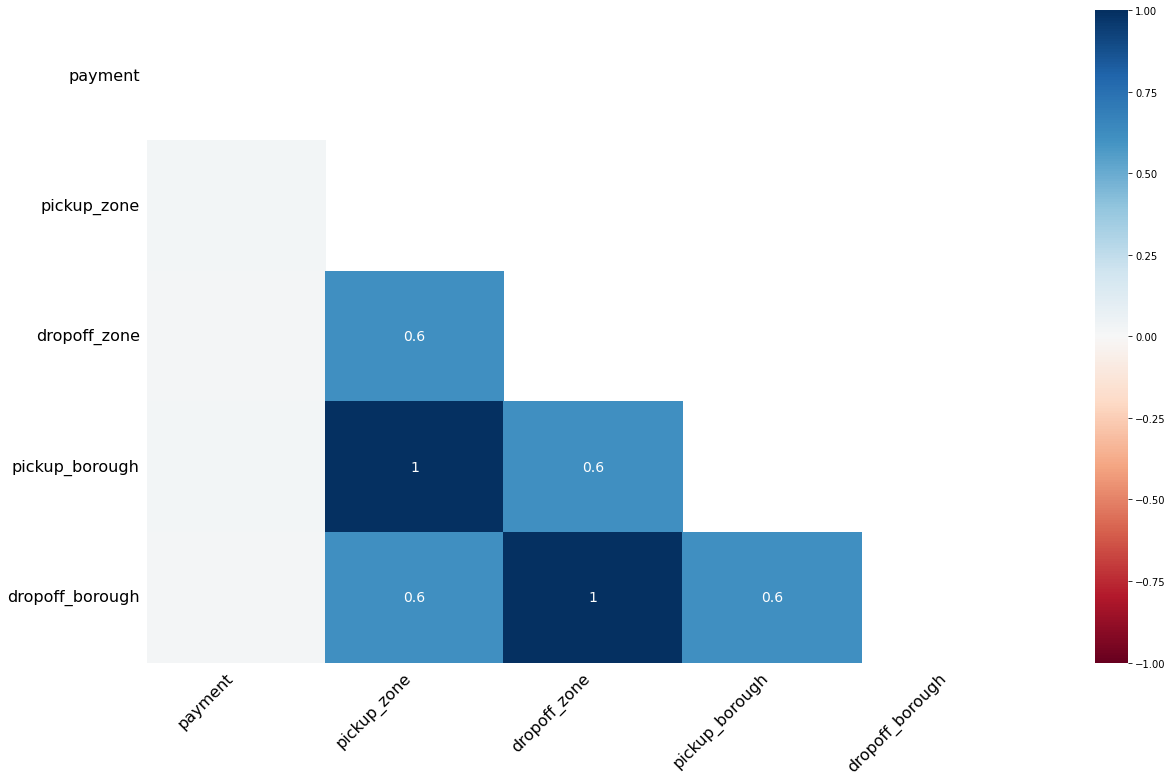

In [109]:
msno.heatmap(df);

**headmap**

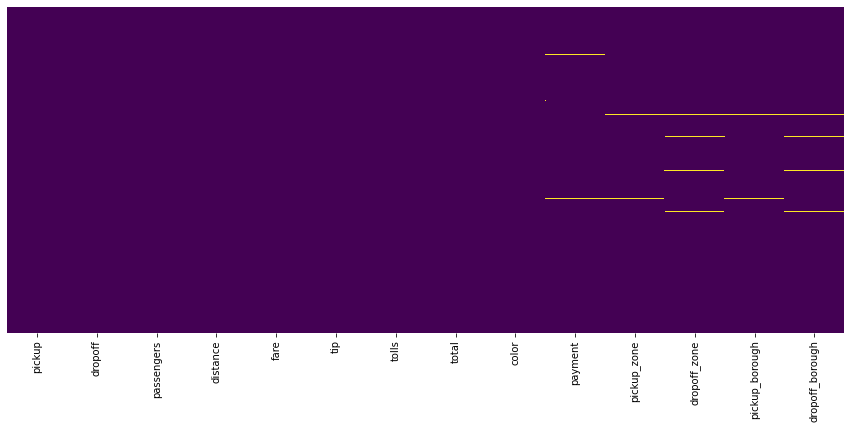

In [114]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

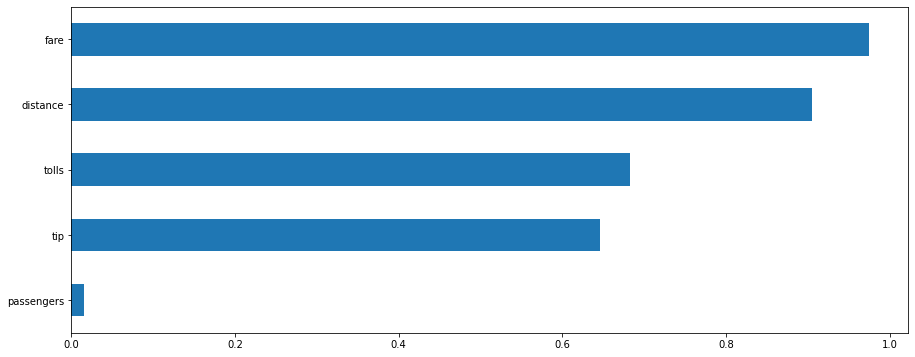

In [116]:
plt.figure(figsize=(15,6))
df.corr()["total"].sort_values()[:-1].plot.barh();

## Dealing with Missing Values

In [155]:
# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini ffill & bfill ile doldurur.
# Hala null deger kalma ihtimaline binaen, gruplama yapmaksizin, uzerinde calisilan sutunda da(col_name) ekstradan ffill & bfill yapar
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

### Mean and Median

### ffill and bfill

In [166]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [167]:
df.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [168]:
fill_prop(df, "pickup_zone", "pickup_borough")

Number of NaN :  0
------------------
Manhattan    5290
Queens        660
Brooklyn      384
Bronx          99
Name: pickup_borough, dtype: int64


In [169]:
fill_prop(df, "pickup_zone", "dropoff_borough")

Number of NaN :  0
------------------
Manhattan        5238
Queens            549
Brooklyn          506
Bronx             138
Staten Island       2
Name: dropoff_borough, dtype: int64


In [170]:
fill_prop(df, "pickup_zone", "dropoff_zone")

Number of NaN :  0
------------------
Upper East Side North    245
Murray Hill              222
Midtown Center           216
Upper East Side South    179
Midtown East             177
                        ... 
Auburndale                 1
Queensboro Hill            1
Ozone Park                 1
Brooklyn Navy Yard         1
Jamaica Estates            1
Name: dropoff_zone, Length: 203, dtype: int64


In [171]:
fill_prop(df, "dropoff_zone", "pickup_zone")

Number of NaN :  0
------------------
Midtown Center                         230
Upper East Side South                  212
Penn Station/Madison Sq West           210
Clinton East                           208
Midtown East                           199
                                      ... 
Pelham Parkway                           1
West Farms/Bronx River                   1
Bensonhurst West                         1
Glendale                                 1
Riverdale/North Riverdale/Fieldston      1
Name: pickup_zone, Length: 194, dtype: int64


In [172]:
df.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone         0
dropoff_zone        0
pickup_borough      0
dropoff_borough     0
dtype: int64

In [173]:
df = df.ffill()
df.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

###  Mode

### Interpolation

### Others methods

You can use Simple imputation, Multivaried Imputation and Ycimpute methods for dealing with missing values. These methods predict the missing values by using some machine learning algorithms.

## Outlier Analysis

### IQR

### Logarithm

### Root

### Winsorization